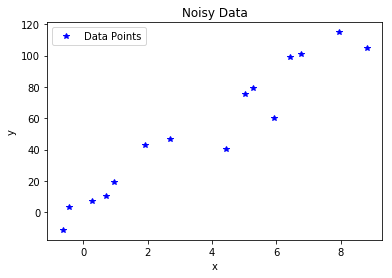

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

noise = 10 * np.random.randn(15) * 1.2
x = 10 * np.random.random(15,)-1

a = np.random.randint(2,15)
b = np.random.randint(2,15)

y_not_noisy = a + b * x
y_noisy = y_not_noisy + noise

y = y_noisy

def plotNoisyDataPoints():
    plt.plot(x, y, '*b', label='Data Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Noisy Data')
    plt.legend()
    plt.show()
    
plotNoisyDataPoints()

In [2]:
def create_hypothesis(theta_0, theta_1):
    def hypothesis(vector_x):
        return theta_0 + theta_1 * vector_x
    return hypothesis

def create_cost_function(linear_hypothesis, x_vector, y_vector):
    def cost_function(theta_0, theta_1):
        h = linear_hypothesis(theta_0, theta_1)
        m = len(x_vector)
        costs = (1. / 2 * m) * ((h(x_vector) - y_vector) ** 2).sum()
        return costs
    return cost_function

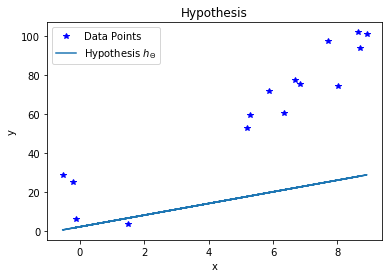

279893.096683


In [3]:
def plotHypothesis(theta_0, theta_1):
    h = create_hypothesis(theta_0, theta_1)
    plt.plot(x, y_noisy, '*b', label='Data Points')
    plt.plot(x, h(x), label='Hypothesis $h_\Theta$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Hypothesis')
    plt.legend()
    plt.show()
    
plotHypothesis(2.,3.)

general_cf = create_cost_function(create_hypothesis, x, y)
specific_cf = general_cf(2.,3.)

print(specific_cf)

[  6.    6.2   6.4   6.6   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2
   8.4   8.6   8.8   9.    9.2   9.4   9.6   9.8  10.   10.2  10.4  10.6
  10.8  11.   11.2  11.4  11.6  11.8  12.   12.2  12.4  12.6  12.8  13.
  13.2  13.4  13.6  13.8]
[  5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6   6.8   7.    7.2
   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.    9.2   9.4   9.6
   9.8  10.   10.2  10.4  10.6  10.8  11.   11.2  11.4  11.6  11.8  12.
  12.2  12.4  12.6  12.8]


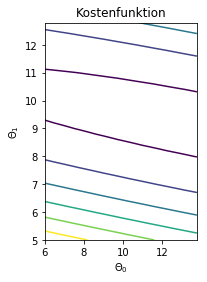

In [4]:
ran = 4.
t0 = np.arange(a - ran, a + ran, ran * 0.05)
t1 = np.arange(b - ran, b + ran, ran * 0.05)
print(t0)
print (t1)

C = np.zeros([len(t0),len(t1)])
c = create_cost_function(create_hypothesis, x, y)

for i, t_0 in enumerate(t0):
    for j, t_1 in enumerate(t1):
        C[j][i] = c(t_0, t_1)

T0, T1 = np.meshgrid(t0, t1)
#121
plt.subplot(121)
plt.contour(T0, T1, C)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.title('Kostenfunktion')
plt.show()

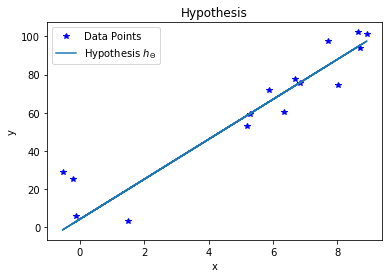

In [5]:
def compute_new_theta(x, y, theta_0, theta_1, alpha):
    m = len(x)
    new_theta_0 = theta_0 - alpha * ((1./m) * (theta_0 + theta_1 * x - y).sum())
    new_theta_1 = theta_1 - alpha * ((1./m) * ((theta_0 + theta_1 * x - y) * x).sum())
    return new_theta_0, new_theta_1

def gradient_decent(x, y, theta_0, theta_1, alpha, iterations):
    cost_function = create_cost_function(create_hypothesis, x, y)
    costs_per_iteration = []
    for i in range(iterations):
        costs_per_iteration.append(cost_function(theta_0, theta_1))
        new_theta_0, new_theta_1 = compute_new_theta(x, y, theta_0, theta_1, alpha)
        theta_0 = new_theta_0
        theta_1 = new_theta_1
    return costs_per_iteration, theta_0, theta_1
costs_per_iteration, theta_0, theta_1 = gradient_decent(x, y, 2., 3., 0.001, 400)
plotHypothesis(theta_0, theta_1)

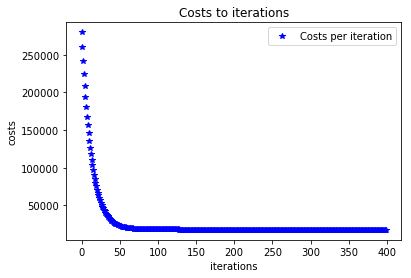

In [6]:
def plotCostsToIterations(cost_list):
    i = len(cost_list)
    iterations = range(i)
    plt.plot(iterations, cost_list, '*b', label='Costs per iteration')
    plt.xlabel('iterations')
    plt.ylabel('costs')
    plt.title('Costs to iterations')
    plt.legend()
    plt.show()
    
plotCostsToIterations(costs_per_iteration)

D:\dev\Anaconda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in square


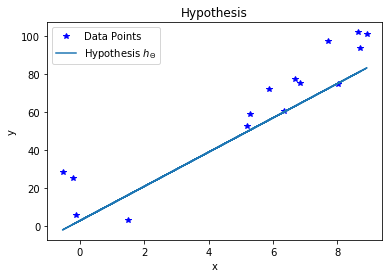

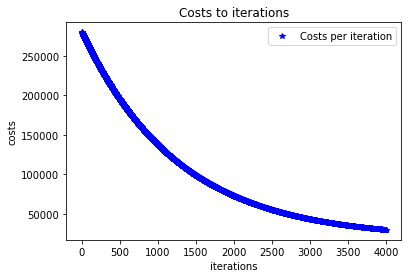

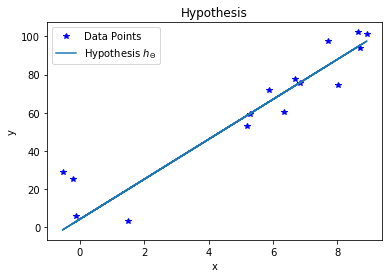

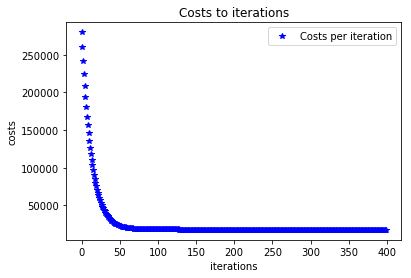

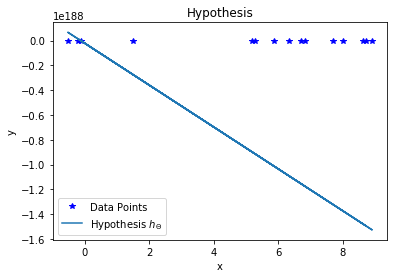

D:\dev\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\transforms.py:2786: RuntimeWarning: overflow encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
D:\dev\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\transforms.py:404: RuntimeWarning: overflow encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)
D:\dev\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\axis.py:1035: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
D:\dev\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\axis.py:1045: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
D:\dev\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\ticker.py:1617: RuntimeWarning: overflow encountered in double_scalars
  dv 

IndexError: index 0 is out of bounds for axis 0 with size 0

In [7]:
costs_per_iteration_1, theta_0_1, theta_1_1 = gradient_decent(x, y, 2., 3., 0.00001, 4000)
costs_per_iteration_2, theta_0_2, theta_1_2 = gradient_decent(x, y, 2., 3., 0.001, 400)
costs_per_iteration_3, theta_0_3, theta_1_3 = gradient_decent(x, y, 2., 3., 0.1, 400)


plotHypothesis(theta_0_1, theta_1_1)
plotCostsToIterations(costs_per_iteration_1)

plotHypothesis(theta_0_2, theta_1_2)
plotCostsToIterations(costs_per_iteration_2)

plotHypothesis(theta_0_3, theta_1_3)
plotCostsToIterations(costs_per_iteration_3)